In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from scipy.stats import yeojohnson
from sklearn import preprocessing

## load dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
max_value = df['Annual Income (k$)'].max()

# Menggunakan loc untuk mendapatkan semua baris dengan nilai maksimum
max_rows = df.loc[df['Annual Income (k$)'] == max_value]
print(max_rows)


     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

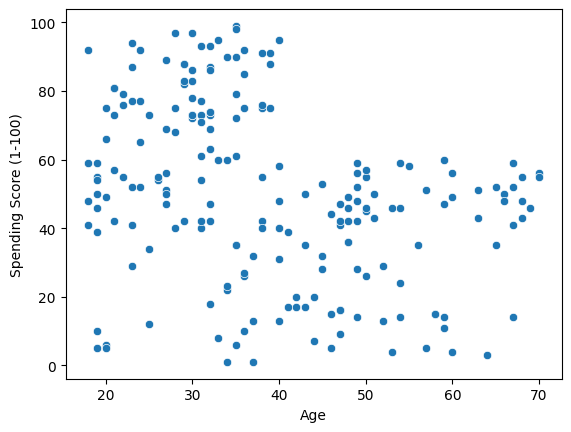

In [4]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

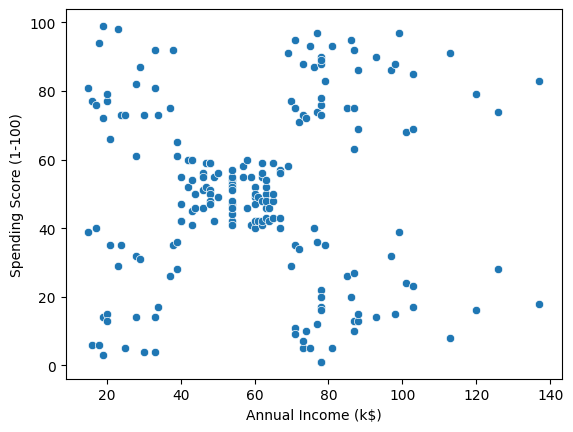

In [5]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
nums=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

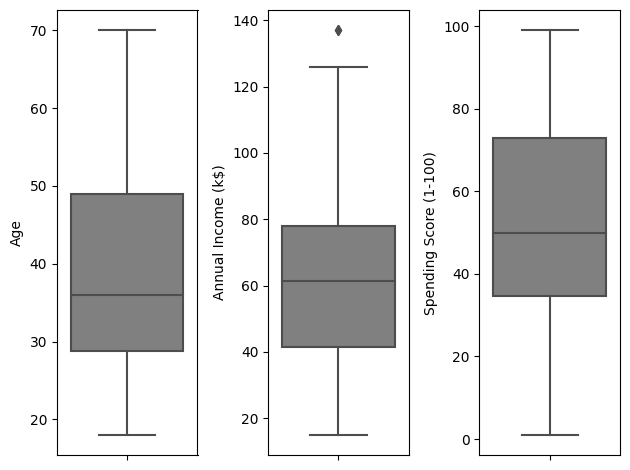

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [12]:
df = df.drop(198)
df = df.drop(199)

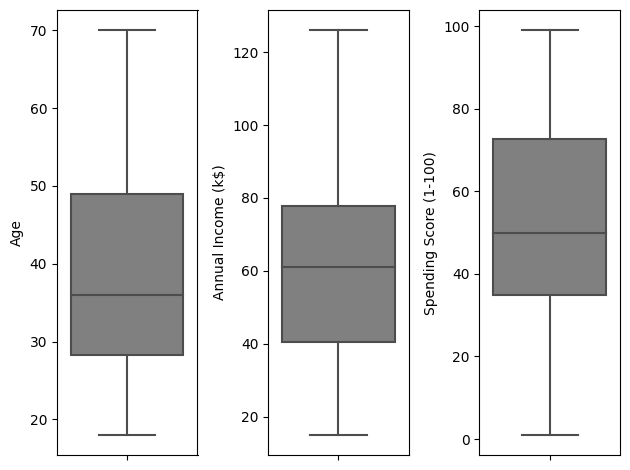

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

## Pre-Processing

### Standarisasi

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
feats = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[feats].values

X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data=X_std, columns = feats)

In [16]:
new_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,1.980000e+02,198.000000,1.980000e+02
mean,1.435440e-16,0.000000,1.104616e-16
std,1.002535e+00,1.002535,1.002535e+00
min,-1.496937e+00,-1.779171,-1.915640e+00
25%,-7.638208e-01,-0.766199,-5.917421e-01
50%,-2.095134e-01,0.048151,-7.669638e-03
75%,7.202926e-01,0.713534,8.781735e-01
max,2.222287e+00,2.630236,1.900300e+00


In [17]:
df_age_spendingScore = pd.DataFrame(data=new_df, columns=['Age', 'Spending Score (1-100)'])
df_age_spendingScore.head()

,Age,Spending Score (1-100)
0,-1.425414,-0.435989
1,-1.282367,1.199413
2,-1.353890,-1.720949
3,-1.139319,1.043661
4,-0.567131,-0.397051


In [18]:
df_annualIncome_spendingScore = pd.DataFrame(data=new_df, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_annualIncome_spendingScore.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


## Clustering K-Means

### 1. Segmentasi menggunakan Usia dan Skor Pengeluaran.
1. Tentuakan jumlah kelompok kemudian plot hasil segmentasinya beserta centroid dari masing-masing kelompok.

### Mencari centroid menggunakan elbow method

In [19]:
from sklearn.cluster import KMeans

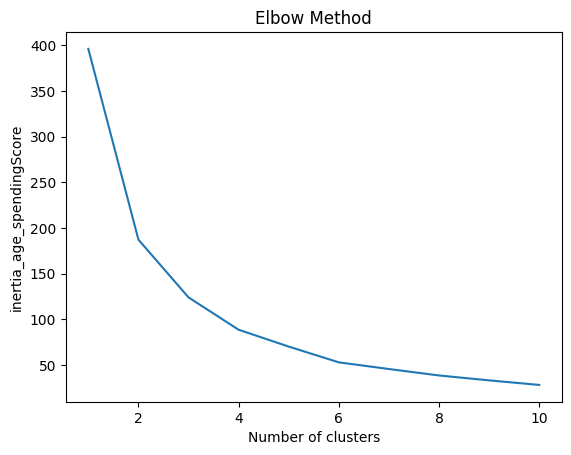

In [20]:
inertia_age_spendingScore = []
for i in range(1,11):
    age_spendingScore_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    age_spendingScore_kmeans.fit(df_age_spendingScore.values)
    inertia_age_spendingScore.append(age_spendingScore_kmeans.inertia_)
plt.plot(range(1, 11), inertia_age_spendingScore)
# sns.scatterplot(x=range(1,11), y = inertia_age_spendingScore, s=50)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_age_spendingScore')
plt.show()

In [21]:
age_spendingScore_kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
age_spendingScore_kmeans.fit(df_age_spendingScore.values)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [22]:
df_age_spendingScore['age_spendingScore_kmeans'] = age_spendingScore_kmeans.labels_

In [23]:
df_age_spendingScore.head()

,Age,Spending Score (1-100),age_spendingScore_kmeans
0,-1.425414,-0.435989,4
1,-1.282367,1.199413,1
2,-1.353890,-1.720949,0
3,-1.139319,1.043661,1
4,-0.567131,-0.397051,4


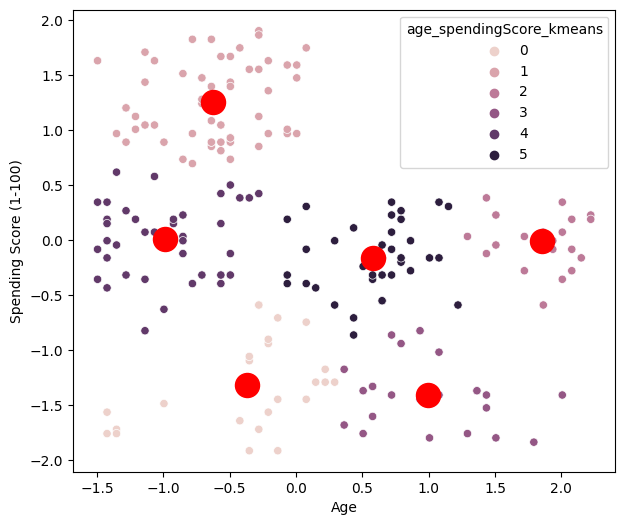

In [24]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_age_spendingScore, x='Age', y='Spending Score (1-100)', hue='age_spendingScore_kmeans')
plt.scatter(age_spendingScore_kmeans.cluster_centers_[:, 0], age_spendingScore_kmeans.cluster_centers_[:, 1], s=300, c='red')

### 2. Segmentasi menggunakan Pendapatan tahunan dan Skor Pengeluaran
1. Tentuakan jumlah kelompok kemudian plot hasil segmentasinya beserta centroid dari masing-masing kelompok

### Mencari centroid menggunakan elbow method

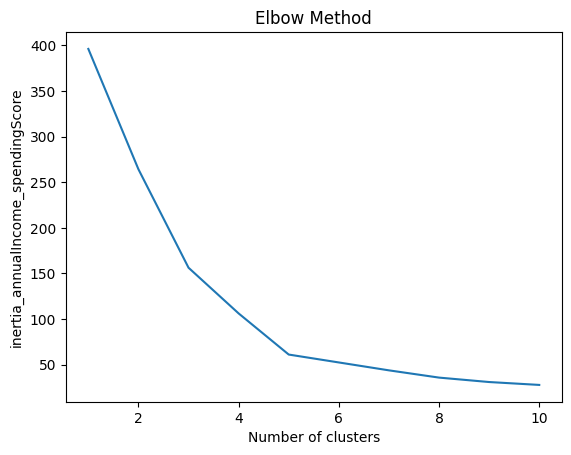

In [25]:
inertia_annualIncome_spendingScore = []
# df_annualIncome_spendingScore
for i in range(1,11):
    annualIncome_spendingScore_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    annualIncome_spendingScore_kmeans.fit(df_annualIncome_spendingScore.values)
    inertia_annualIncome_spendingScore.append(annualIncome_spendingScore_kmeans.inertia_)
plt.plot(range(1, 11), inertia_annualIncome_spendingScore)
# sns.scatterplot(x=range(1,11), y = inertia_annualIncome_spendingScore, s=50)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_annualIncome_spendingScore')
plt.show()

In [26]:
annualIncome_spendingScore_kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
annualIncome_spendingScore_kmeans.fit(df_annualIncome_spendingScore.values)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [27]:
df_annualIncome_spendingScore['annualIncome_spendingScore_kmeans'] = annualIncome_spendingScore_kmeans.labels_

In [28]:
df_annualIncome_spendingScore.head()

,Annual Income (k$),Spending Score (1-100),annualIncome_spendingScore_kmeans
0,-1.779171,-0.435989,2
1,-1.779171,1.199413,3
2,-1.739447,-1.720949,2
3,-1.739447,1.043661,3
4,-1.699723,-0.397051,2


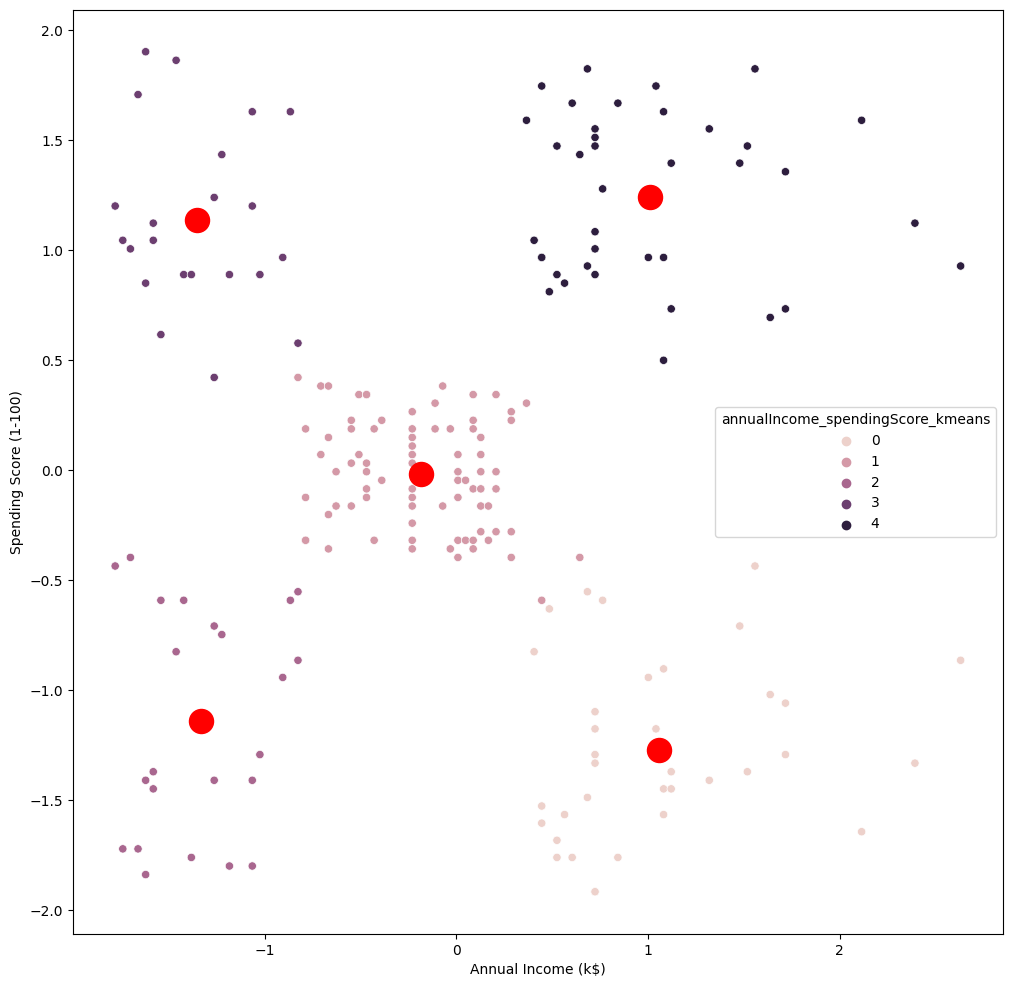

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_annualIncome_spendingScore, x='Annual Income (k$)', y='Spending Score (1-100)', hue='annualIncome_spendingScore_kmeans')
plt.scatter(annualIncome_spendingScore_kmeans.cluster_centers_[:, 0], annualIncome_spendingScore_kmeans.cluster_centers_[:, 1], s=300, c='red')

### 3. Segmentasi menggunakan Usia, Pendapatan tahunan dan skor pengeluaran
1. Tentuakan jumlah kelompok kemudian plot hasil segmentasinya menggunakan plot 3D

### Mencari centroid menggunakan elbow method

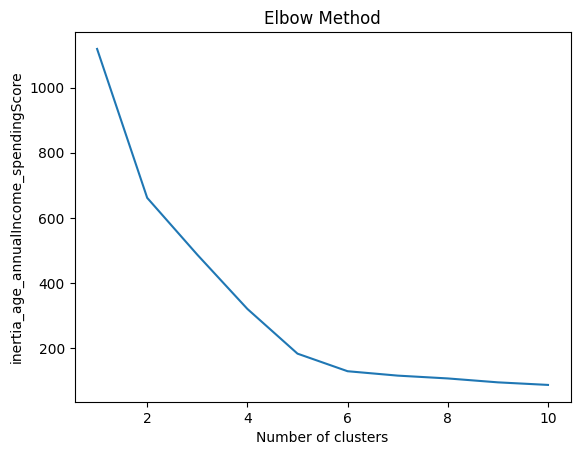

In [35]:
inertia_age_annualIncome_spendingScore = []
for i in range(1,11):
    age_annualIncome_spendingScore_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    age_annualIncome_spendingScore_kmeans.fit(new_df.values)
    inertia_age_annualIncome_spendingScore.append(age_annualIncome_spendingScore_kmeans.inertia_)
plt.plot(range(1, 11), inertia_age_annualIncome_spendingScore)
# sns.scatterplot(x=range(1,11), y = inertia_age_annualIncome_spendingScore, s=50)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_age_annualIncome_spendingScore')
plt.show()

In [31]:
age_annualIncome_spendingScore_kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
age_annualIncome_spendingScore_kmeans.fit(new_df.values)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [32]:
new_df['age_annualIncome_spendingScore_kmeans'] = age_annualIncome_spendingScore_kmeans.labels_

In [33]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),age_annualIncome_spendingScore_kmeans
0,-1.425414,-1.779171,-0.435989,0
1,-1.282367,-1.779171,1.199413,0
2,-1.353890,-1.739447,-1.720949,4
3,-1.139319,-1.739447,1.043661,0
4,-0.567131,-1.699723,-0.397051,4


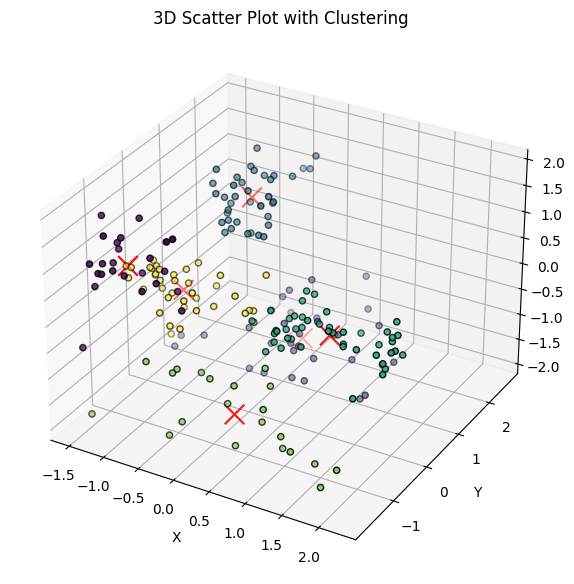

In [34]:

# labels = age_annualIncome_spendingScore_kmeans.labels_
centroids = age_annualIncome_spendingScore_kmeans.cluster_centers_

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(new_df['Age'], new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=new_df['age_annualIncome_spendingScore_kmeans'], edgecolor='k')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with Clustering')

# Show the plot
plt.show()